In [3]:
import pandas as pd

# 1. โหลดข้อมูล
df = pd.read_csv('/workspaces/Deep-learning-for-condominium-price-prediction-using-heterogeneous-analysis/rawdata/tabular_data/condo/add_coordinate/add_coordinate.csv',encoding='cp874')

In [4]:
# 2. คำนวณค่า Q1 (25th percentile) และ Q3 (75th percentile)
Q1 = df['sale_price'].quantile(0.25)
Q3 = df['sale_price'].quantile(0.75)
IQR = Q3 - Q1

# 3. กำหนดขอบเขตล่างและบนสำหรับการคัดกรอง Outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 4. กรองข้อมูลเอาเฉพาะที่อยู่ในขอบเขต (ลบ Outlier ออก)
df_cleaned = df[(df['sale_price'] >= lower_bound) & (df['sale_price'] <= upper_bound)]

# แสดงผลลัพธ์จำนวนแถวที่เหลืออยู่
print(f"จำนวนแถวเดิม: {len(df)}")
print(f"จำนวนแถวหลังจากลบ Outlier: {len(df_cleaned)}")
print(f"จำนวนแถวที่ถูกลบออก: {len(df) - len(df_cleaned)}")

# บันทึกไฟล์ใหม่
df_cleaned.to_csv('cleaned_add_coordinate.csv', index=False)

จำนวนแถวเดิม: 16515
จำนวนแถวหลังจากลบ Outlier: 14737
จำนวนแถวที่ถูกลบออก: 1778


ก่อนทำการ cleaning outlier
Basic Statistics:
--- สถิติของราคาขาย (หน่วย: บาท) ---
จำนวนข้อมูล (Count): 16,515
ค่าเฉลี่ย (Mean): 11,147,817
ส่วนเบี่ยงเบนมาตรฐาน (Std): 22,213,888
ราคาต่ำสุด (Min): 400,000
25% (Q1): 2,790,000
50% (Median): 5,300,000
75% (Q3): 10,650,000
ราคาสูงสุด (Max): 485,966,287

Missing Values: 0
Skewness: 9.04
Kurtosis: 133.56
Price is 0: 0
Price < 0: 0


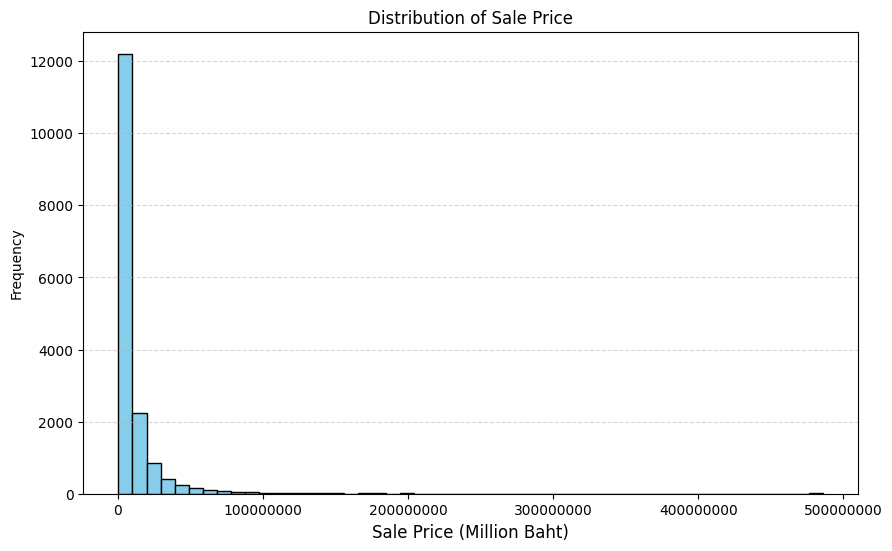

In [19]:
import matplotlib.pyplot as plt
print('ก่อนทำการ cleaning outlier')
# 1. ดูค่าสถิติพื้นฐาน (Count, Mean, Std, Min, 25%, 50%, 75%, Max)
print("Basic Statistics:")
# คำนวณค่าสถิติ
stats = df['sale_price'].describe()

# แสดงผลแบบจัดรูปแบบ (ใส่ลูกน้ำ และตัดทศนิยมทิ้ง)
print("--- สถิติของราคาขาย (หน่วย: บาท) ---")
print(f"จำนวนข้อมูล (Count): {int(stats['count']):,}")
print(f"ค่าเฉลี่ย (Mean): {int(stats['mean']):,}")
print(f"ส่วนเบี่ยงเบนมาตรฐาน (Std): {int(stats['std']):,}")
print(f"ราคาต่ำสุด (Min): {int(stats['min']):,}")
print(f"25% (Q1): {int(stats['25%']):,}")
print(f"50% (Median): {int(stats['50%']):,}")
print(f"75% (Q3): {int(stats['75%']):,}")
print(f"ราคาสูงสุด (Max): {int(stats['max']):,}")

# 2. ตรวจสอบค่าที่หายไป (Missing Values)
print(f"\nMissing Values: {df['sale_price'].isnull().sum()}")

# 3. ตรวจสอบรูปร่างการกระจายตัว (Skewness & Kurtosis)
# Skewness: > 0 เบ้ขวา, < 0 เบ้ซ้าย, = 0 สมมาตร
# Kurtosis: ค่าสูงๆ แปลว่ามี Outlier เยอะ หรือกราฟโด่งผิดปกติ
print(f"Skewness: {df['sale_price'].skew():.2f}")
print(f"Kurtosis: {df['sale_price'].kurt():.2f}")

# 4. ตรวจสอบความผิดปกติ (ราคาเป็น 0 หรือ ติดลบ)
print(f"Price is 0: {(df['sale_price'] == 0).sum()}")
print(f"Price < 0: {(df['sale_price'] < 0).sum()}")

# 5. พล็อตกราฟดูการกระจายตัว
plt.figure(figsize=(10, 6))
plt.hist(df['sale_price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price (Million Baht)', fontsize=12)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.f'))
plt.show()

หลังทำการ cleaning outlier
Basic Statistics:
--- สถิติของราคาขาย (หน่วย: บาท) ---
จำนวนข้อมูล (Count): 14,737
ค่าเฉลี่ย (Mean): 6,104,605
ส่วนเบี่ยงเบนมาตรฐาน (Std): 4,718,130
ราคาต่ำสุด (Min): 400,000
25% (Q1): 2,580,000
50% (Median): 4,500,000
75% (Q3): 8,000,000
ราคาสูงสุด (Max): 22,433,619

Missing Values: 0
Skewness: 1.37
Kurtosis: 1.35
Price is 0: 0
Price < 0: 0


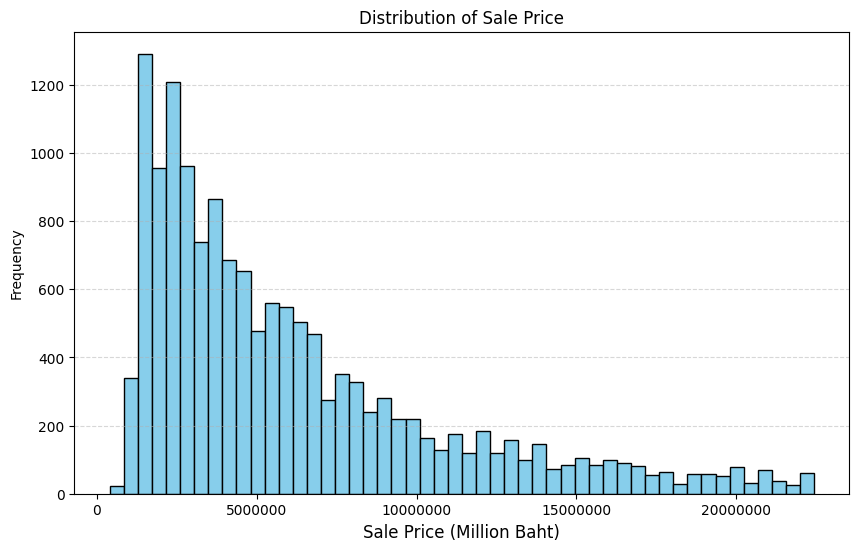

In [18]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

print('หลังทำการ cleaning outlier')
# 1. ดูค่าสถิติพื้นฐาน (Count, Mean, Std, Min, 25%, 50%, 75%, Max)
print("Basic Statistics:")
# คำนวณค่าสถิติ
stats = df_cleaned['sale_price'].describe()

# แสดงผลแบบจัดรูปแบบ (ใส่ลูกน้ำ และตัดทศนิยมทิ้ง)
print("--- สถิติของราคาขาย (หน่วย: บาท) ---")
print(f"จำนวนข้อมูล (Count): {int(stats['count']):,}")
print(f"ค่าเฉลี่ย (Mean): {int(stats['mean']):,}")
print(f"ส่วนเบี่ยงเบนมาตรฐาน (Std): {int(stats['std']):,}")
print(f"ราคาต่ำสุด (Min): {int(stats['min']):,}")
print(f"25% (Q1): {int(stats['25%']):,}")
print(f"50% (Median): {int(stats['50%']):,}")
print(f"75% (Q3): {int(stats['75%']):,}")
print(f"ราคาสูงสุด (Max): {int(stats['max']):,}")

# 2. ตรวจสอบค่าที่หายไป (Missing Values)
print(f"\nMissing Values: {df_cleaned['sale_price'].isnull().sum()}")

# 3. ตรวจสอบรูปร่างการกระจายตัว (Skewness & Kurtosis)
# Skewness: > 0 เบ้ขวา, < 0 เบ้ซ้าย, = 0 สมมาตร
# Kurtosis: ค่าสูงๆ แปลว่ามี Outlier เยอะ หรือกราฟโด่งผิดปกติ
print(f"Skewness: {df_cleaned['sale_price'].skew():.2f}")
print(f"Kurtosis: {df_cleaned['sale_price'].kurt():.2f}")

# 4. ตรวจสอบความผิดปกติ (ราคาเป็น 0 หรือ ติดลบ)
print(f"Price is 0: {(df_cleaned['sale_price'] == 0).sum()}")
print(f"Price < 0: {(df_cleaned['sale_price'] < 0).sum()}")

# 5. พล็อตกราฟดูการกระจายตัว
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['sale_price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price (Million Baht)', fontsize=12)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.f'))
plt.show()

In [20]:
df_cleaned.to_csv('cleaned_add_coordinate.csv', index=False)